# TP 2.2 : Estimation

## 1. Loi de Pareto

On considère dans cette partie une variable aléatoire suivant une loi de Pareto d'indice $\alpha$. C'est-à-dire $X\sim \mathcal{P}(\alpha)$ si 
$$
\mathbb{P}(X>t)=x^{-\alpha},\quad t>1.
$$
On supposera, si besoin, que le parametre $\alpha>2$ pour s'arrurer que l'espérance et la variance de $X$ soit bien définie.



    En utilisant le fait suivant :
Si $Z$ est une variable aléatoire de fonction de répartition $F$ alors si $U\sim \mathcal{U}([0,1])$, la variable $F^{-1}(U)$ suit la même loi que $Z$.

Construire un vecteur de taille 100 contenant des réalisations d'une variable aléatoire suivant une loi $\mathcal{P}(3)$.
    
</div>

In [8]:
## A FAIRE

rpareto <- function(n, alpha){
    x <- runif(n)
    f <- 1/(1-x^(-alpha))
    return(f)
}

vecteur_100_p3 <- rpareto(100, 3)

##  2. Estimation

Dans cette partie on souhaite comparer les estimateurs par la méthodes des moments et du maximum de vraisemblance du parametre $\alpha$.
<div class="alert alert-block alert-success">
    Utilisez la cellule suivante pour répondre aux questions :
    <ol>
        <li> Calculer (à la main) l'estimateur par la méthode des moments de $\alpha$.</li>
        <li> Discuter en quelque mots si cet estimateur est fortement consistent ? Asymptotiquement normal ? </li>
        <li> Illustrer numériquement la consistence de l'estimateur des moments. </li>
        <li> Illustrer, en vous inspirant de la première partie du TP 2.1 numériquement, la normalité asymptotique de l'estimateur des moments.</li>
    </ol>
</div>

In [13]:
#A FAIRE
#esperance loi de pareto = alpha /(alpha-1)
m <- mean(vecteur_100_p3)
cat("méthde des moments, alpha : ")
alpha_moments <- function(m){
    return(m/(m-1)) #ESTIMATEUR de alpha par la méthode des moments 
} 

alpha_moments(m)



méthde des moments, alpha : 

[1] 0.628393

In [11]:
#ILLUSTRATION NUMÉRIQUE DE LA CONSISTENCE :
# Paramètre vrai
alpha <- 2.5
n_vec <- c(10, 50, 200, 1000, 5000)
set.seed(123)



hat_alpha_mm <- sapply(n_vec, function(n){
  X <- rpareto(n, alpha)
  mean(X)/(mean(X)-1)
})

data.frame(n = n_vec, alpha_hat = hat_alpha_mm)


n,alpha_hat
<dbl>,<dbl>
10,2.397917
50,2.485573
200,2.707187
1000,2.558329
5000,2.506037


<div class="alert alert-block alert-success">
    Utilisez la cellule suivante pour répondre aux questions :
    <ol>
        <li> Calculer (à la main) l'estimateur du maximum de vraisemblance de $\alpha$.</li>
        <li> Illustrer numériquement la consistence de l'estimateur des moments. </li>
        <li> Illustrer, en vous inspirant de la première partie du TP 2.1, numériquement la normalité asymptotique de l'estimateur des moments.</li>
    </ol>
</div>

In [ ]:
#A FAIRE



#  générer un échantillon
set.seed(123)
n <- 100
alpha_true <- 2.5
X <- rpareto(n, alpha_true) #échantillon généré

# Estimateur du maximum de vraisemblance pour alpha
alpha_mv <- function(x) {
  n <- length(x)
  alpha_hat <- n / sum(log(x)) #formule du max de vraisemblance de alpha pour pareto : c'est un ESTIMATEUR
  return(alpha_hat)
}

# Calcul
hat_alpha <- alpha_mv(X) # MV de alpha pour l'échantillon généré 
cat("Estimateur MV de alpha :", hat_alpha, "\n")




Estimateur MV de alpha : 2.563679 


<div class="alert alert-block alert-success">
    Utilisez la cellule suivante pour répondre aux questions :
    <ol>
        <li> En vous inspirant de la première partie du TP 2.1, calculer la variance de chaqun des deux estimateurs.</li>
        <li> L'un vous semble-t-il plus performent ? Est-ce surprenant ?  </li>
    </ol>
</div>

Variance empirique Méthode des Moments : 0.07866865 
Variance empirique Maximum de Vraisemblance : 0.06343069 


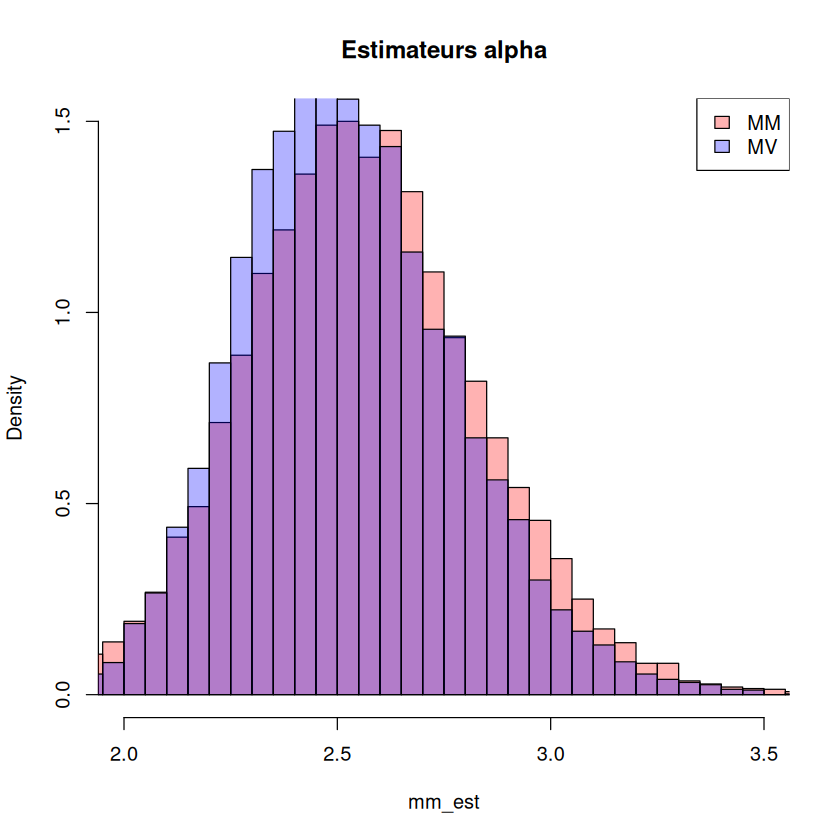

In [16]:
# Fonction pour générer des tirages Pareto standard
rpareto <- function(n, alpha, xm = 1) {
  u <- runif(n)
  xm * (1 - u)^(-1/alpha)
}

# Estimateur par méthode des moments
alpha_mm <- function(x) {
  mean(x) / (mean(x) - 1)
}

# Estimateur par maximum de vraisemblance
alpha_mv <- function(x) {
  n <- length(x)
  n / sum(log(x))
}

# Paramètres
alpha_true <- 2.5
n <- 100        # taille de l'échantillon
B <- 10000      # nombre de simulations

# Vecteurs pour stocker les estimateurs
mm_est <- numeric(B)
mv_est <- numeric(B)

# Simulations
set.seed(123)
for(b in 1:B){
  X <- rpareto(n, alpha_true)
  mm_est[b] <- alpha_mm(X)
  mv_est[b] <- alpha_mv(X)
}

# Variance empirique
var_mm <- var(mm_est)
var_mv <- var(mv_est)

cat("Variance empirique Méthode des Moments :", var_mm, "\n")
cat("Variance empirique Maximum de Vraisemblance :", var_mv, "\n")

# Histogramme pour visualiser la distribution
par (bg = "white")
hist(mm_est, breaks=50, probability=TRUE, main="Estimateurs alpha", col=rgb(1,0,0,0.3), xlim=c(2,3.5))
hist(mv_est, breaks=50, probability=TRUE, col=rgb(0,0,1,0.3), add=TRUE)
legend("topright", legend=c("MM","MV"), fill=c(rgb(1,0,0,0.3), rgb(0,0,1,0.3)))



In [ ]:
#MV plus efficace : variance plus faible

## 3. Pour aller plus loin : le bootstrap.

Maintenant, contrairement à la première partie du TP 2.1, nous supposerons avoir uniquement un vecteur de 100 réalisation de notre loi de Pareto et qu'il nous est IMPOSSIBLE d'en tirer ou simuler d'avantage.

Pour criconvenir a ce désagrément B. Efron propose en 1979 la méthode suivante :

Soit $X_1,\dots,X_n$ notre échantillon. On va alors tirer dans cet échantillon pour construire un echantillon bootstrap.
Formellement on tirer $u(1),\dots,u(n)$ $n$ variables aléatoires i.i.d uniforme sur {$1,\dots,n$} (donc discrète). Léchantillon bootstrap est alors $X_{u(1)},\dots,X_{u(n)}$.

Attention : ce n'est pas un mélange des $(X_i)$, en effet le même $X_{i_0}$ peut apparaitre plusieur fois dans l'échantillon bootstrap.

Pour $B\in \mathbb{N}$ on peut répéter cette opétation $B$ fois et ainsi obtenir $B$ échantillons noté $X_{1}^b,\dots,X_{n}^b$ pour $b$ allant de $1$ à $B$. Sur chaque échantillon on peut alors construire un estimateur de $\alpha$ et ainsi obtenir $\hat \alpha_n^1,\dot,\hat \alpha_n^B$, $B$ estimateur bootstrap.

Sous certaine condition, en particulier si $\sqrt{n}(\hat \alpha_n-\alpha)\underset{n\rightarrow\infty}{\longrightarrow}\mathcal{N}(0,\sigma^2)$, on a 
$$
\sqrt{B}\left(\frac{1}{B}\sum_{b=1}^B\hat \alpha_n^b-\alpha_n\right)\underset{n\rightarrow\infty}{\longrightarrow}\mathcal{N}(0,\sigma^2).
$$

<div class="alert alert-block alert-success">
    Utilisez la cellule suivante pour répondre aux questions :
    <ol>
        <li> Mettre en place une procédure bootsrap pour l'estimateur du maximum de vraisemblance. Vous pourrez vous aider de la fonction <code>sample()<code>. </li>
        <li> Vérifier numériquement que la moyenne des estimateur bootstrap vérifie bien la propriété ci dessus. </li>
    </ol>
</div>

In [ ]:
#A FAIRE

<div class="alert alert-block alert-success">
    Utilisez la cellule suivante pour répondre aux questions : Les questions 2 et 3 concernent les tests que nous verrons demain, vous pourrez donc y revenir à ce moment la.
    <ol>
        <li> Se servir de cette méthode pour estimer la variance de l'estimateur du maximum de vraisemblance. </li>
        <li> Comment se servir de cette méthode pour construire un test de niveau $0.95$ testant l'hypothèse $H_0 : \alpha= 3$ contre l'alternative $H_1\neq 3$ </li>
        <li> Vous chercherez à évaluer la puissance de ce test en fonction de $\alpha$. </li>
    </ol>
</div>

In [ ]:
#A FAIRE